In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path='/home/ucfilho/Documents/Aulas/Ago_29_2018'
os.chdir(path)

In [3]:
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")
#DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv",index_col="emit")

In [4]:
print(DAT.head())

   Unnamed: 0  Case  Hydrofoil    Froude  Resistence   Sinkage      Trim  \
0           1     1          1  0.000000    0.000000  0.000000  0.000000   
1           2     2          1  0.103733    2.549729 -0.689028  1.353022   
2           3     3          1  0.124480    3.628461 -0.835413  1.346323   
3           4     4          1  0.165973    6.374322 -1.864337  1.361538   
4           5     5          1  0.186719    8.217973 -2.301539  1.378858   

      Power  
0  0.000000  
1  0.950991  
2  1.624000  
3  3.803965  
4  5.517212  


In [5]:
# Obs:Dat=DAT.iloc[:,[2,3]] funciona
# Obs:Dat=DAT.iloc[:,[2,3,4,5,6,7]] nao funciona (too many index)
# print(DAT.head())

In [6]:
Index=[2,3,4,5,6,7]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [7]:
Min=np.min(Dat_Select.iloc[:,[3]])
print(float(Min))
print(Dat_Select.info())

-6.500114614
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
Hydrofoil     59 non-null int64
Froude        59 non-null float64
Resistence    59 non-null float64
Sinkage       59 non-null float64
Trim          59 non-null float64
Power         59 non-null float64
dtypes: float64(5), int64(1)
memory usage: 2.8 KB
None


In [8]:
# normatizando os dados (existe forma automatica de fazer nao discutiremos
def normalizeCols(M):
    Num=len(M.columns)
    for i in range(Num):
        #Max=M.iloc[:,[i]].max()
        Max=float(np.max(M.iloc[:,[i]]))
        #Min=M.iloc[:,[i]].min()
        Min=float(np.min(M.iloc[:,[i]]))
        a=(Max+Min)/2
        b=(Max-Min)/2
        M.iloc[:,[i]] = M.iloc[:,[i]].apply(lambda x: (x-a)/b)
    return M
DAT=normalizeCols(Dat_Select)
print(Dat_Select.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0       -1.0 -1.000000   -1.000000 -0.883085 -1.000000 -1.000000
1       -1.0 -0.913570   -0.986458 -0.895478 -0.459481 -0.999415
2       -1.0 -0.896283   -0.980729 -0.898111 -0.462157 -0.999001
3       -1.0 -0.861711   -0.966146 -0.916618 -0.456079 -0.997659
4       -1.0 -0.844425   -0.956354 -0.924482 -0.449160 -0.996605


In [9]:
X=DAT.iloc[:,[2,3]]
print(X.head())

   Resistence   Sinkage
0   -1.000000 -0.883085
1   -0.986458 -0.895478
2   -0.980729 -0.898111
3   -0.966146 -0.916618
4   -0.956354 -0.924482


In [10]:
Index=[2,3,4,5]
Dat_Select=[]
Y=DAT.iloc[:,Index].copy()
print(Y.head())

   Resistence   Sinkage      Trim     Power
0   -1.000000 -0.883085 -1.000000 -1.000000
1   -0.986458 -0.895478 -0.459481 -0.999415
2   -0.980729 -0.898111 -0.462157 -0.999001
3   -0.966146 -0.916618 -0.456079 -0.997659
4   -0.956354 -0.924482 -0.449160 -0.996605


In [11]:
# parte futura.....
#train=data.sample(frac=0.4,random_state=200)
#test=data.drop(train.index)

In [12]:
#from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


In [13]:
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(9, 8), 
                    random_state=1)

In [14]:
clf.fit(X, Y)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [15]:
W=clf.predict(X)

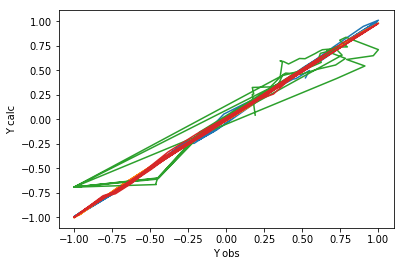

In [16]:
# plot results
plt.plot(Y,W)
plt.xlabel('Y obs')
plt.ylabel('Y calc')
plt.show()

In [17]:
print(Y.head())

   Resistence   Sinkage      Trim     Power
0   -1.000000 -0.883085 -1.000000 -1.000000
1   -0.986458 -0.895478 -0.459481 -0.999415
2   -0.980729 -0.898111 -0.462157 -0.999001
3   -0.966146 -0.916618 -0.456079 -0.997659
4   -0.956354 -0.924482 -0.449160 -0.996605


In [18]:
print(W[0:5,:])

[[-0.99460209 -0.87616488 -0.6924928  -0.99810132]
 [-0.97993099 -0.8874524  -0.66605657 -0.99876307]
 [-0.97487506 -0.89028657 -0.65704438 -0.99874942]
 [-0.95640971 -0.90647294 -0.62429381 -0.99930575]
 [-0.94601848 -0.91394149 -0.60612231 -0.99914316]]
